# Import Packages

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sns.set_style('whitegrid')
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.datasets import make_moons
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score


# Show and Plot Data

In [17]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Clean Data
First we need to check for the null values

In [18]:
nan_count = diabetes_data.isnull().sum().sum()
print('Number of NaN values:', nan_count)

Number of NaN values: 0


**We dont have null values but there is mislabeled values which is 0 ,<br> we cannot have 0 for this features, 
we will replace it to NaN to easy process it.**

In [19]:
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [20]:
nan_count = diabetes_data.isnull().sum().sum()
print('Number of NaN values:', nan_count)

Number of NaN values: 652


In [21]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


now as we see all of the 0 values has changed to NaN **In this case we will change the NaN values with the
MEDIAN of entire coulmn.**

In [22]:
diabetes_data.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64


**ANALYSIS:** <br>
As we observe in the healthcare data, there are numerous **outliers** present. These outliers can significantly impact the calculation of the **average**, **making it less representative of the central tendency of the data.** Therefore, a prudent approach to cleaning this data is to utilize the **median**, which remains robust in the presence of outliers. By employing the median, we can attain more accurate results, as it is not influenced by extreme values, ensuring a more reliable assessment of the data's characteristics.

In [23]:
diabetes_data.fillna(diabetes_data.median(), inplace=True)
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


# Standardization

In [24]:
scaler = StandardScaler()
scaler.fit(diabetes_data.drop('Outcome',axis=1))
scaled_features = scaler.transform(diabetes_data.drop('Outcome',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=diabetes_data.columns[:-1])
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496


# Train-Test Model

we need to know that **changing randome_state will affect the performance**, so the train_test_split method will 
split the data randomly and random_state will **give you different split** and it will be **saved**, so if someone choose this value, it will give the same performance as mine if i also put the same value ,but if we did not have this attributes it will change the performance everytime we run (no save).
**i have choosed 22 and it will be saved if you open the notebook feel free to change it. i have provide user input.**


In [25]:
xRand = int(input())
X_train, X_test, y_train, y_test = train_test_split(scaled_features,diabetes_data['Outcome'],
                                                    test_size=0.30,random_state=xRand)


In [26]:

def plot_decision_boundary(X, y, model, title):
    h = .02 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

   
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm')

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


# Number of Nearest Neigbours & predict & accuracy
**changeing the number of Nearest Neigbours(K) will also affect the performance 
since it will vote for the k Nearest data point so there is 3 states:<br>
- **OverFiting  (k = 1)** : it happens when we choose a small k value.
- **UnderFiting (k=all)** : it heppens when we choose a large k neibours.
- **GoodFit** : when we choose a good vallue which is not large or small.
<br>
**i used 150 also for the k neibours feel free to change it since its an input value**
 

In [27]:

k = int(input())

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

test_predictions = knn.predict(X_test)

test_accuracy = accuracy_score(y_test, test_predictions)
print("Testing Accuracy:", test_accuracy)
print(len(y_test))

Testing Accuracy: 0.7445887445887446
231


# plot Decision Boundary

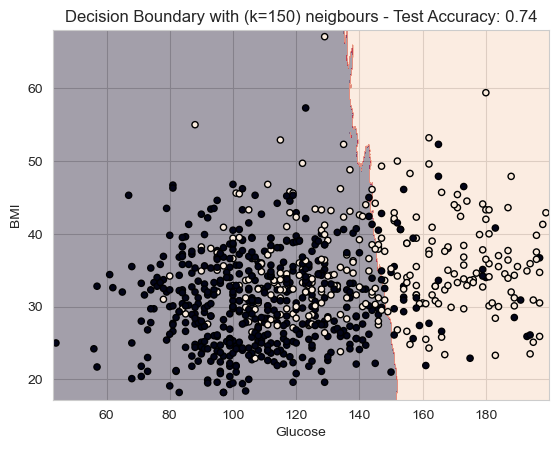

In [28]:
# Select two features for visualization
feature1 = 'Glucose'
feature2 = 'BMI'

# Extract the selected features
X_selected_features = diabetes_data[[feature1, feature2]].values

# Train-test split on selected features
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected_features, diabetes_data['Outcome'],
                                                                                        test_size=0.30, random_state=101)

# Fit KNN on selected features
knn_selected = KNeighborsClassifier(n_neighbors=k)
knn_selected.fit(X_train_selected, y_train_selected)

# Plot decision boundary
x_min, x_max = X_selected_features[:, 0].min() - 1, X_selected_features[:, 0].max() + 1
y_min, y_max = X_selected_features[:, 1].min() - 1, X_selected_features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = knn_selected.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_selected_features[:, 0], X_selected_features[:, 1], c=diabetes_data['Outcome'], s=20, edgecolor='k')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Decision Boundary with (k=%d) neigbours - Test Accuracy: %.2f' % (k, test_accuracy))
plt.show()


# finally<br>
 - we can see that if you choose for example the k = 150 and random_state = 22 so it will give you the above. 
 - if you try for example random state = 22 k = 1 the accuracy will be **0.69** which is low and over fitting.
 - if all values choosen which is random state = 22 k = 231 it will underfit and give accuracy of **0.70**.